In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

In [10]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Descriptive Statistics

In [11]:
df.describe()
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [12]:
print(df.describe())
print(df.info())
print(df.isnull().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

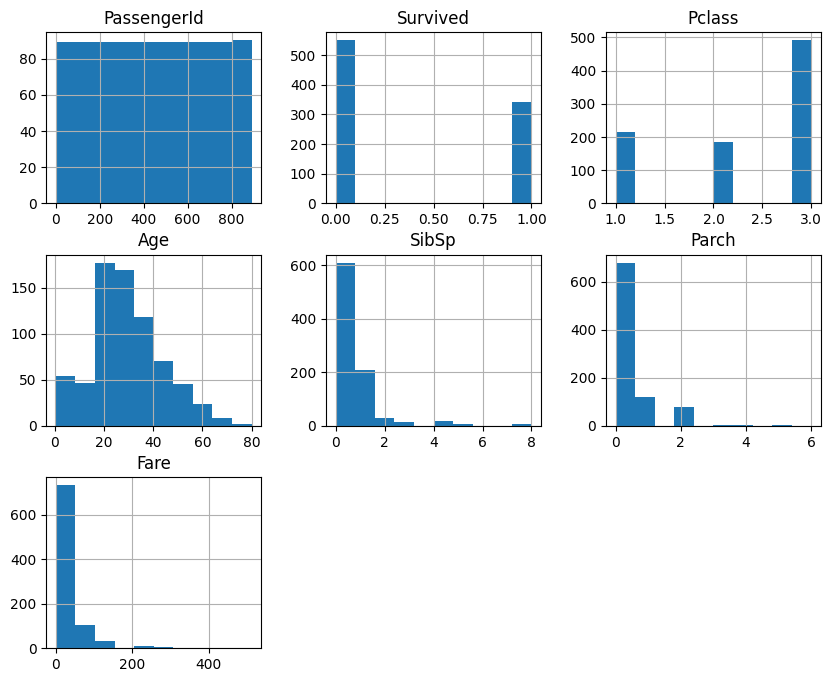

In [13]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8))
plt.show()

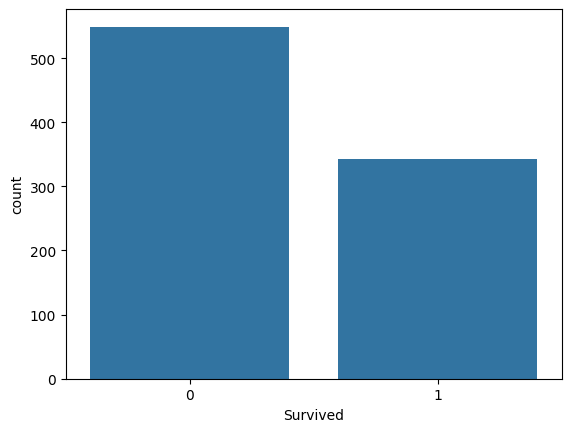

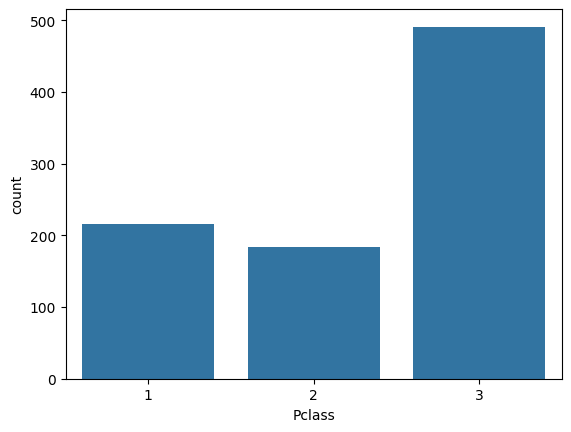

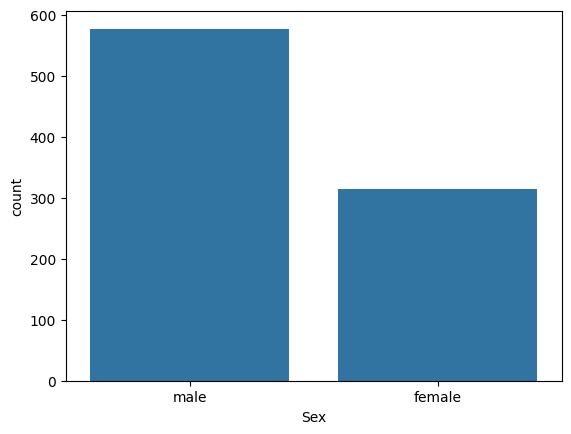

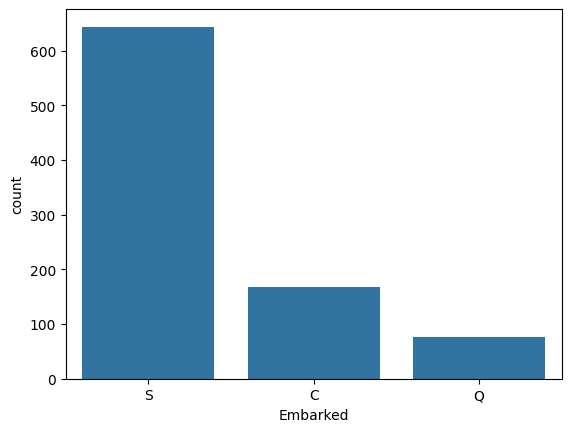

In [14]:
sns.countplot(x='Survived', data=df)
plt.show()
sns.countplot(x='Pclass', data=df)
plt.show()
sns.countplot(x='Sex', data=df)
plt.show()
sns.countplot(x='Embarked', data=df)
plt.show()

Correlation Matrix


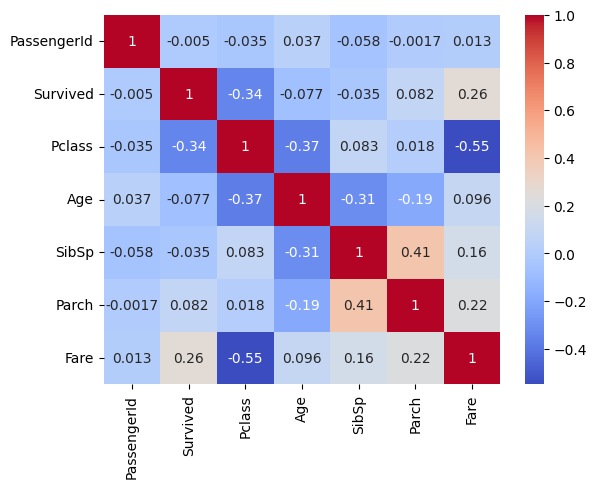

In [15]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

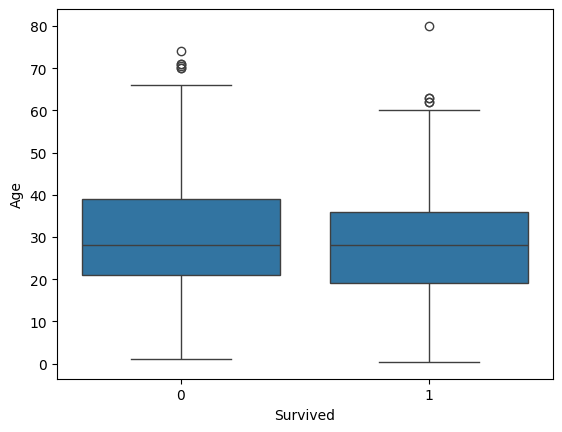

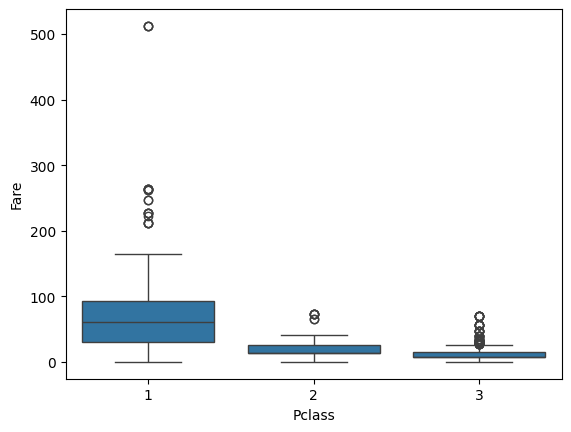

In [16]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.show()

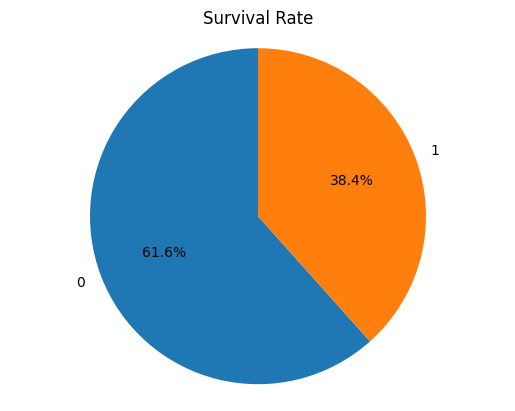

In [17]:

survived_counts = df['Survived'].value_counts()
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate')
plt.axis('equal')
plt.show()

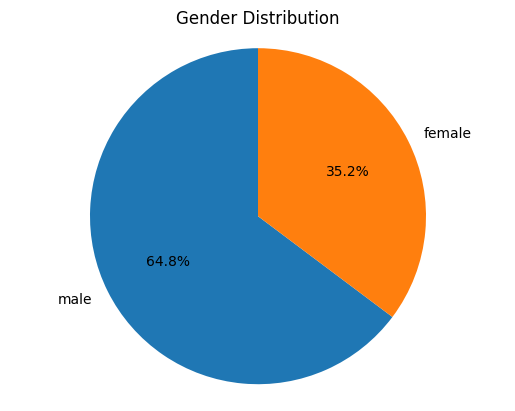

In [18]:
sex_counts = df['Sex'].value_counts()

plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

In [19]:
import plotly.express as px

# Interactive Histograms
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numerical_features:
    fig = px.histogram(df, x=col, title=f'Interactive Histogram of {col}', hover_data=df.columns)
    fig.show()

# Interactive Box Plots
for col in numerical_features:
    fig = px.box(df, y=col, title=f'Interactive Box Plot of {col}', hover_data=df.columns)
    fig.show()

# Interactive Scatter Plot Matrix
fig = px.scatter_matrix(df, dimensions=numerical_features, color='Survived',
                       title='Interactive Scatter Plot Matrix', hover_data=df.columns)
fig.show()

# Interactive Scatter Plot: Age vs. Fare colored by Pclass
fig = px.scatter(df, x='Age', y='Fare', color='Pclass', title='Age vs. Fare by Pclass',
                 hover_data=df.columns)
fig.show()